In [19]:
def fib(n):
    assert n >= 0
    if n < 2:
        return 1
    fn = 1
    fn1 = 1
    for _ in range(2, n + 1):
        fn, fn1 = fn1, fn + fn1
    return fn1

In [21]:
fib(7)

21

In [60]:
def fib_digit(n):
    assert n >= 1
    f1, f2 = 1, 1
    for _ in range(n - 2):
        f1, f2 = f2, (f1 + f2) % 10
    return f2

In [62]:
fib_digit(841645)

5

In [65]:
def fib_mod(n, m):
    assert n >= 1
    assert m >= 1
    f = [0, 1]
    if n > 1:
        for i in range(2, n + 1):
            f.append((f[i - 1] + f[i - 2]) % m)
            if f[i] == 1 and f[i - 1] == 0:
                n = n % (i - 1)
                break
    return f[n]


In [66]:
fib_mod(10, 2)

1

In [40]:
def fib1(n):
    assert n >= 0
    return n if n <= 1 else fib1(n - 1) + fib1(n - 2)

In [13]:
fib1(8)

21

In [26]:
fib1(80)

KeyboardInterrupt: 

In [16]:
cache = {}
def fib2(n):
    assert n >= 0
    if n not in cache:
        cache[n] = n if n <= 1 else fib2(n - 1) + fib2(n - 2)
    return cache[n]    

In [17]:
fib2(8)

21

In [22]:
def memo(f):
    cache = {}
    def inner(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return inner

In [23]:
fib1 = memo(fib1)

In [24]:
fib1(80)

23416728348467685

In [27]:
from functools import lru_cache

In [29]:
fib1 = lru_cache(maxsize=None)(fib1)

In [30]:
fib1(80)

23416728348467685

In [32]:
def fib3(n):
    assert n >= 0
    f0, f1 = 0, 1
    for i in range(n - 1):
        f0, f1 = f1, f0 + f1
    return f1

In [33]:
fib3(8000)

3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

In [35]:
import time

In [36]:
def timed(f, *args, n_iter=100):
    acc = float("inf")
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

In [37]:
timed(fib3, 800)

0.00012140801118221134

In [39]:
from matplotlib import pyplot as plt

In [41]:
def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label = f.__name__)
        plt.legend()
        plt.grid(True)

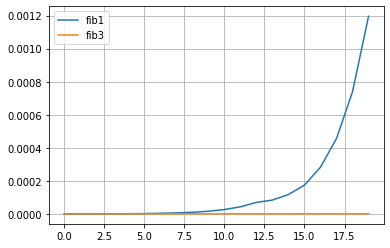

In [42]:
compare((fib1, fib3), list(range(20)))